In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import csv
from scipy.stats import norm
import numpy as np
import scipy.stats as stats

In [2]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

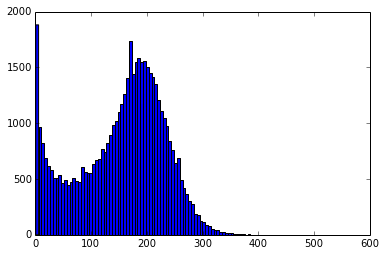

In [10]:
unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0])
plt.hist(unmaskedSynapsesNoZero, bins = 100)
plt.show()

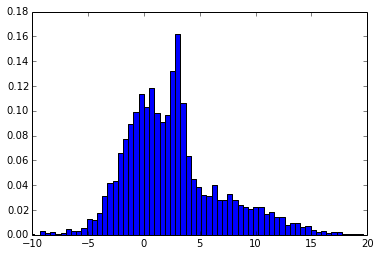

In [11]:
np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

In [33]:
print x
print len(x)
y = x[2300:]
print y
print len(y)
z = [x[:2300],x[2300:]]

z = np.vstack(z)
print type(z)
print z

z = z.reshape(-1, 1)
print z

[-0.83351569 -0.11253365 -4.27239219 ...,  3.3388401   2.95246163
  2.55136449]
4600
[  6.14420706  13.69775174   4.09194643 ...,   3.3388401    2.95246163
   2.55136449]
2300
<type 'numpy.ndarray'>
[[ -0.83351569  -0.11253365  -4.27239219 ...,   5.2373651    8.21389964
    1.00285464]
 [  6.14420706  13.69775174   4.09194643 ...,   3.3388401    2.95246163
    2.55136449]]
[[-0.83351569]
 [-0.11253365]
 [-4.27239219]
 ..., 
 [ 3.3388401 ]
 [ 2.95246163]
 [ 2.55136449]]


In [34]:

from sklearn.mixture import GMM
clf = GMM(2, n_iter=500, random_state=3).fit(z)
xpdf = np.linspace(-10, 20, 1000)
density = np.exp(clf.score(xpdf))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-10, 20);

/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: The shape of X  is not compatible with self